In [1]:
import os

from einops import rearrange
from shapely import Polygon, MultiPolygon
from matplotlib import colormaps
import numpy as np
import rasterio
import skimage
import matplotlib.pyplot as plt
import seaborn as sns

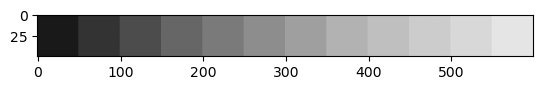

In [66]:
# COLORS = np.asarray([.15, .25, .55, .75, .9])
COLORS = np.concat((
    np.linspace(.1, .4, 4),
    np.linspace(.48, .7, 4),
    np.linspace(.75, .9, 4)
))

n = 50
blocks = []
for c in COLORS:
    blocks.append(np.full((n, n, 3), c))
blocks = np.concat(blocks, axis=1)
plt.imshow(blocks)

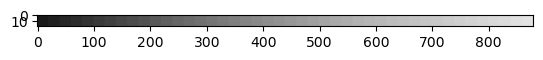

In [67]:
# full pallette
n = 20
n_gap = 3
cs = []
for i, c1 in enumerate(COLORS[:-1]):
    c2 = COLORS[i+1]
    vals = np.linspace(c1, c2, n_gap + 2)[:-1]
    cs += list(vals)
    
blocks = []
for c in cs:
    blocks.append(np.full((n, n, 3), c))
blocks = np.concat(blocks, axis=1)
plt.imshow(blocks)

In [68]:
rgb = skimage.io.imread('/Users/erikstorrs/Downloads/img_and_polys.png')[..., :-1]
gray = skimage.color.rgb2gray(rgb)
gray = rearrange(np.stack([gray, gray, gray]), 'c h w -> h w c')
gray.shape

(4776, 3336, 3)

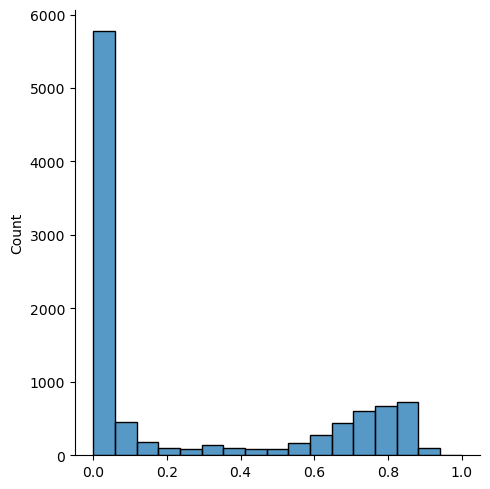

In [69]:
sns.displot(np.random.choice(gray.flatten(), 10000))

In [70]:
gray.max()

np.float64(1.0)

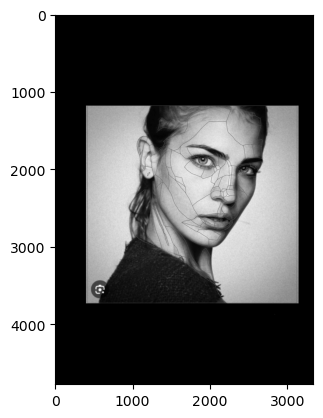

In [71]:
plt.imshow(gray)

In [72]:
img = skimage.io.imread('/Users/erikstorrs/Downloads/polys.png')
img.shape

(4776, 3336, 4)

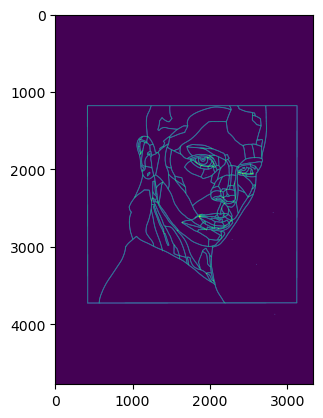

In [73]:
img = img[..., -1]>0
plt.imshow(img)

In [74]:
from rasterio.features import shapes
def shapely_from_mask(mask):
    objs = shapes(mask.astype(np.int16), mask=mask > 0)
    p = next(iter(objs))
    coordinates = p[0]['coordinates']

    if len(coordinates) == 1:
        poly = Polygon(coordinates[0])
    else:
        poly = Polygon(shell=coordinates[0], holes=coordinates[1:])

    return poly

In [75]:
meshes = np.stack(np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]), indexing='ij'))
pts = rearrange(meshes, 'c h w -> (h w) c')
pts = pts[np.random.permutation(pts.shape[0])]

polys = []
masks = []
while True:
    mask = None
    for pt in pts:
        mask = skimage.segmentation.flood(img, tuple(pt))
        poly = shapely_from_mask(np.flip(mask, 0))
        polys.append(poly)
        masks.append(mask)
        break

    keep = ~mask[pts[:, 0], pts[:, 1]]
    pts = pts[keep]
    print(pts.shape)

    if not len(pts):
        break
        

(6892633, 2)
(6743819, 2)
(5348046, 2)
(3559621, 2)
(3557606, 2)
(3496541, 2)
(3465181, 2)
(3248074, 2)
(3236069, 2)
(3211002, 2)
(2394383, 2)
(2387892, 2)
(2359212, 2)
(2231523, 2)
(2089300, 2)
(2080654, 2)
(1977662, 2)
(1827650, 2)
(1813657, 2)
(1483154, 2)
(1475331, 2)
(1471884, 2)
(1449754, 2)
(1444833, 2)
(1306746, 2)
(1240718, 2)
(1192132, 2)
(1170447, 2)
(1010146, 2)
(922281, 2)
(900366, 2)
(893999, 2)
(854140, 2)
(806582, 2)
(804979, 2)
(790599, 2)
(757730, 2)
(697657, 2)
(694695, 2)
(646044, 2)
(639153, 2)
(620310, 2)
(606215, 2)
(588954, 2)
(586188, 2)
(576190, 2)
(575845, 2)
(572826, 2)
(568148, 2)
(565550, 2)
(563566, 2)
(550071, 2)
(546470, 2)
(530496, 2)
(526317, 2)
(518881, 2)
(510107, 2)
(503516, 2)
(479198, 2)
(471552, 2)
(463719, 2)
(458798, 2)
(455326, 2)
(436564, 2)
(429589, 2)
(425045, 2)
(417278, 2)
(411480, 2)
(397021, 2)
(392917, 2)
(361501, 2)
(360410, 2)
(346836, 2)
(339737, 2)
(335057, 2)
(333054, 2)
(319309, 2)
(310446, 2)
(306391, 2)
(304580, 2)
(287501, 2)

In [76]:
scene = MultiPolygon(polys)

In [77]:
scene

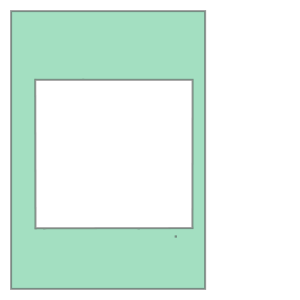

In [78]:
p = polys[0]
p

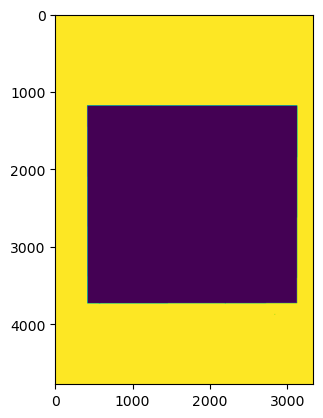

In [79]:
plt.imshow(masks[0])

In [80]:
colors = []
for mask in masks:
    avg = gray[mask].mean()
    deltas = np.abs(COLORS - avg)
    color = COLORS[deltas.argmin()]
    colors.append(color)

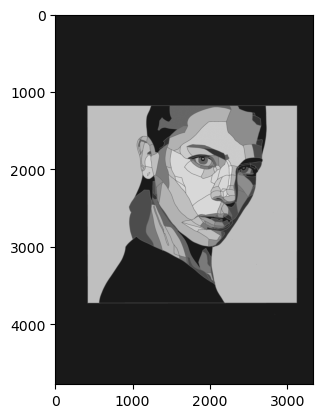

In [81]:
blank = np.zeros_like(gray)
for mask, color in zip(masks, colors):
    blank[mask] = [color] * 3
plt.imshow(blank)

In [185]:
blanks = [np.ones_like(gray) for i in range(len(COLORS))]
for i, (mask, color) in enumerate(zip(masks, colors)):
    print(i)
    idx = list(COLORS).index(color)
    for j in range(idx, len(COLORS)):
        blanks[j][mask] = [COLORS[j]] * 3
for x in blanks:
    x[img] = [1., 0., 0.]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229


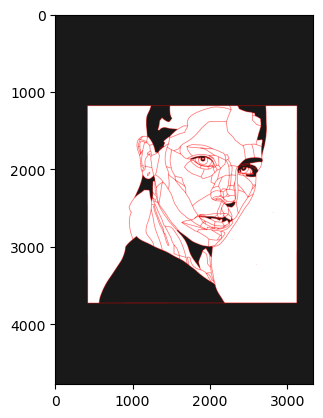

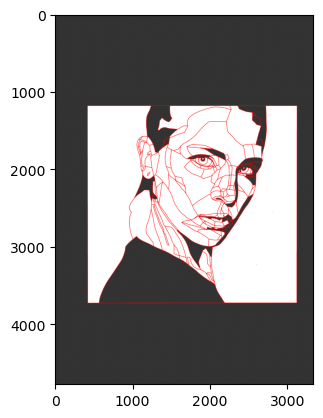

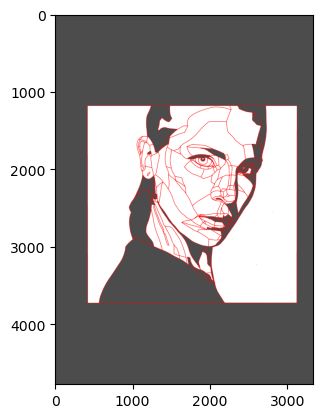

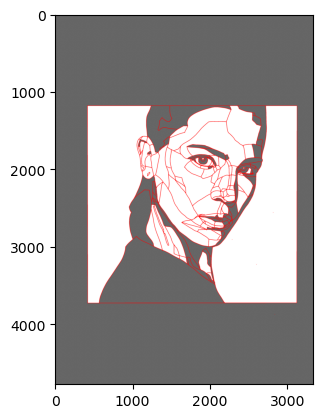

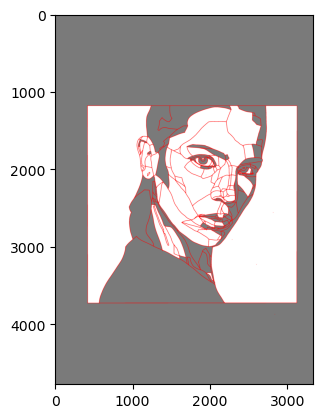

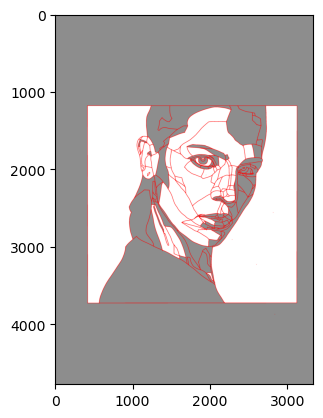

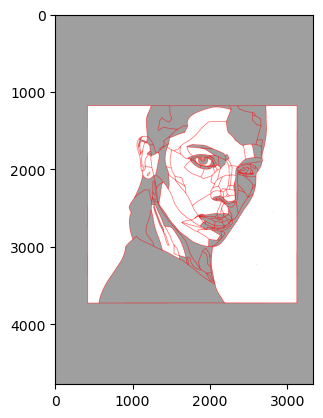

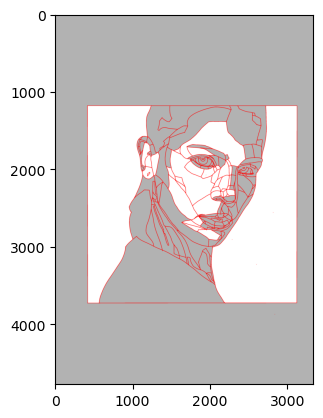

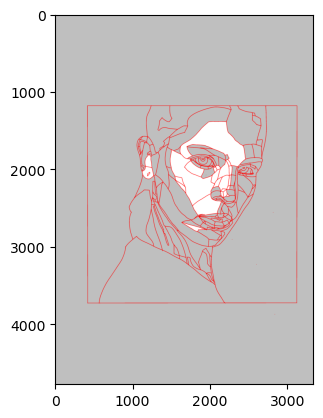

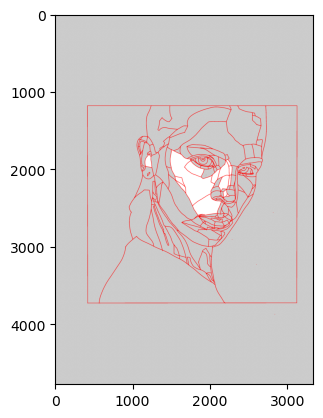

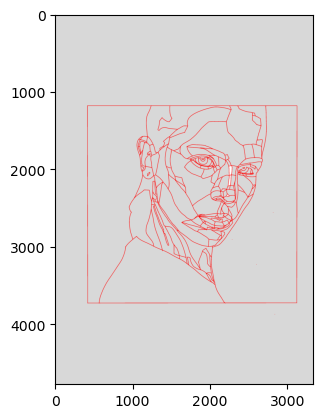

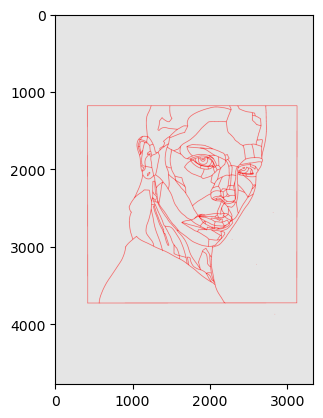

In [186]:
for x in blanks:
    plt.imshow(x)
    plt.show()

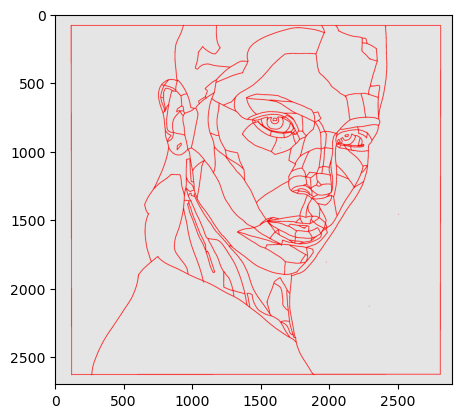

In [187]:
r1, r2, c1, c2 = 1100, 3800, 300, 3200
plt.imshow(blanks[-1][r1:r2, c1:c2])

In [188]:
size = r2 - r1, c2 - c1
size

(2700, 2900)

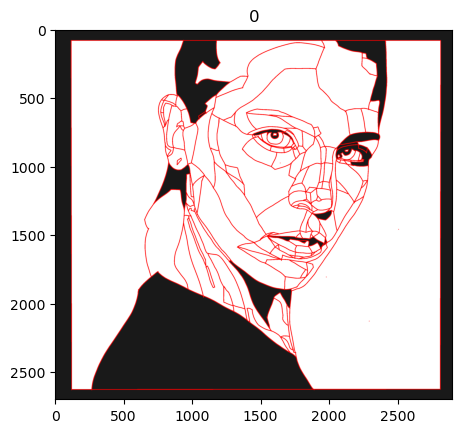

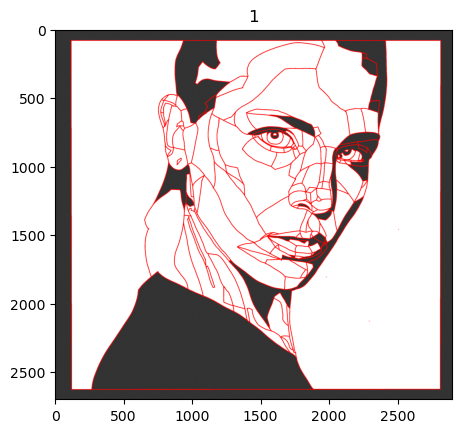

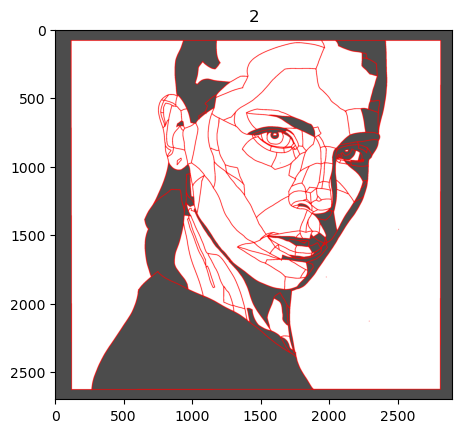

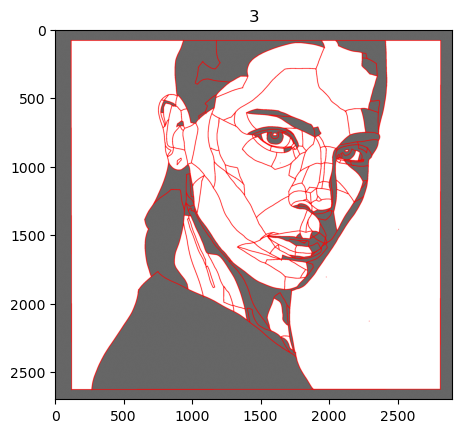

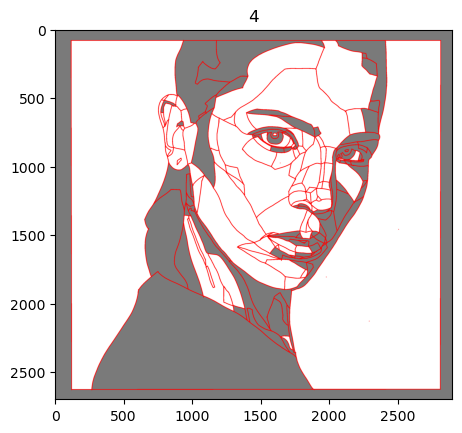

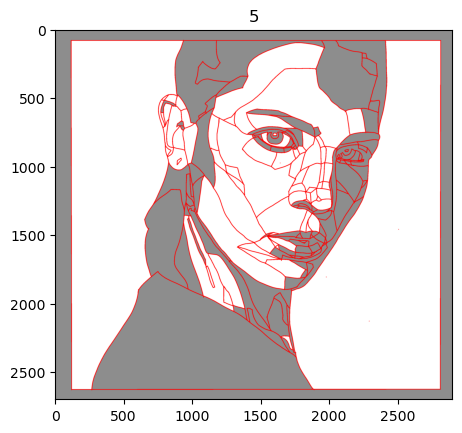

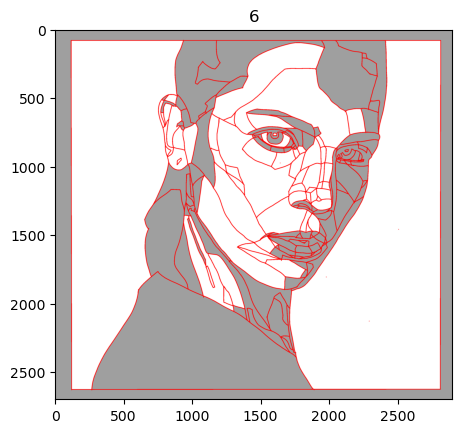

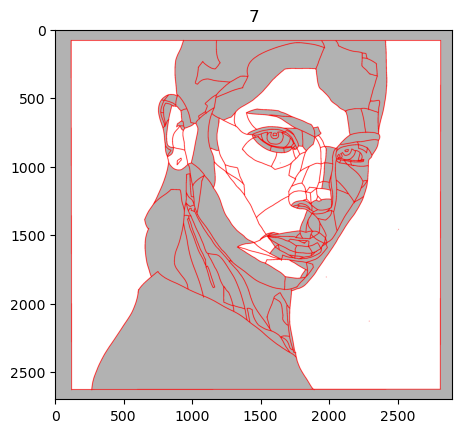

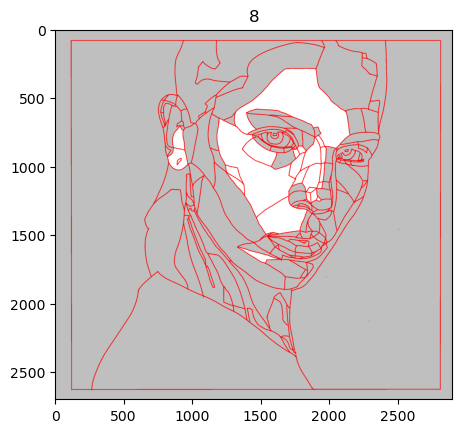

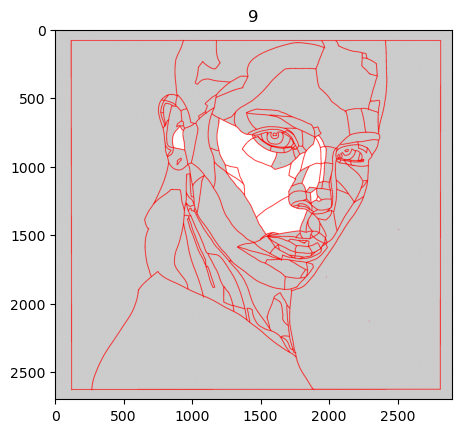

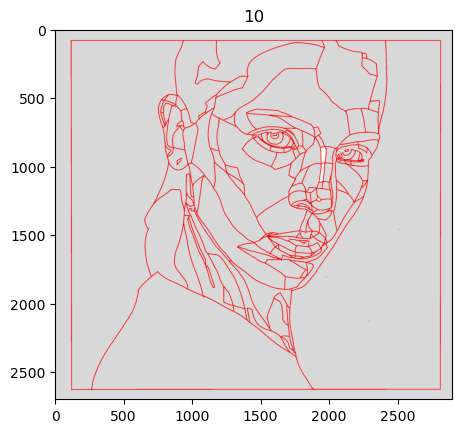

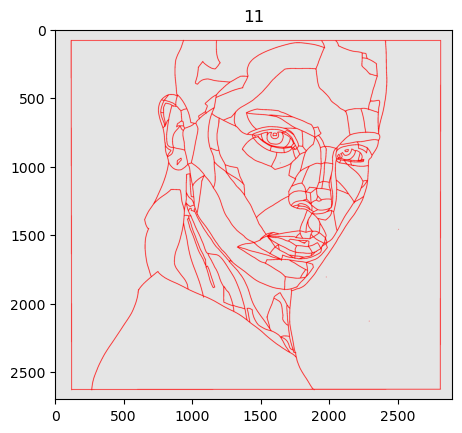

In [189]:
blanks = [x[r1:r2, c1:c2] for x in blanks]
for i, x in enumerate(blanks):
    plt.imshow(x)
    plt.title(i)
    plt.show()

In [110]:
n_y_tiles = 20
grid_res = size[0] // n_y_tiles
n_x_tiles = size[1] // grid_res

n_y_tiles, n_x_tiles, grid_res

(20, 21, 135)

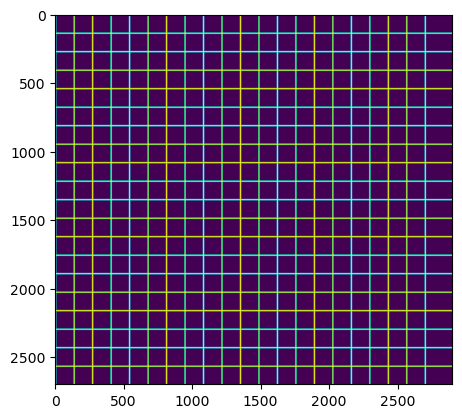

In [111]:
border = 10
mask = np.zeros((size[0], size[1]), dtype=bool)
for i in range(n_y_tiles):
    for j in range(n_x_tiles):
        r1 = i * grid_res
        r2 = r1 + border
        c1 = j * grid_res
        c2 = c1 + border
        
        mask[r1:r2] = True
        mask[:, c1:c2] = True
plt.imshow(mask)
        

In [112]:
mask.shape, blanks[0].shape

((2700, 2900), (2700, 2900, 3))

In [115]:
for x in blanks:
    x[mask] = [0, 0, 1.]

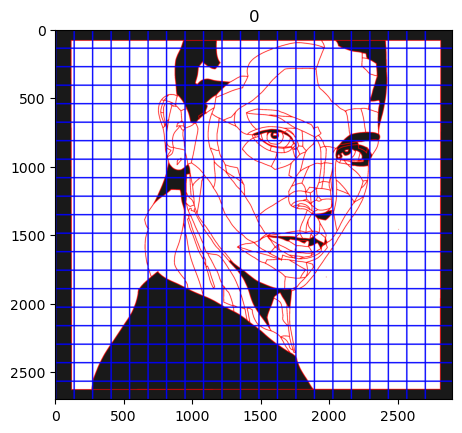

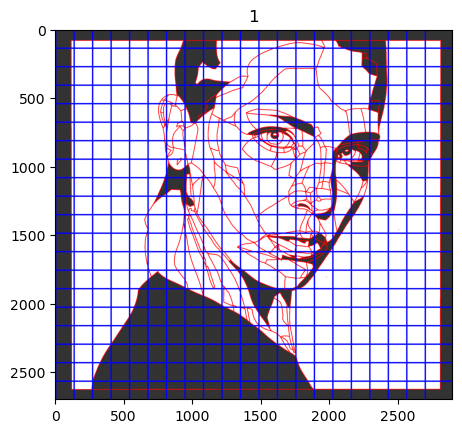

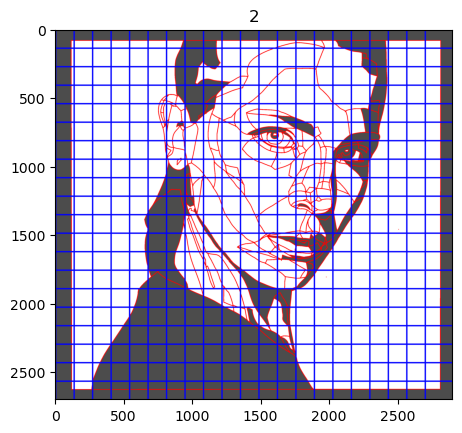

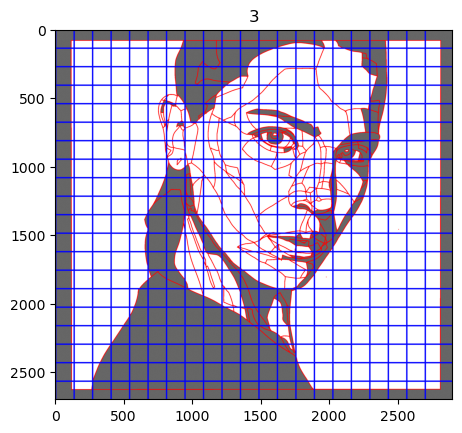

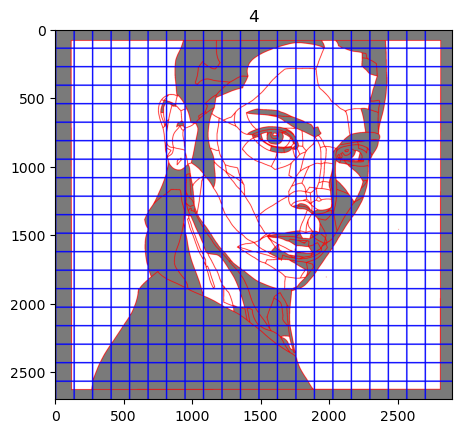

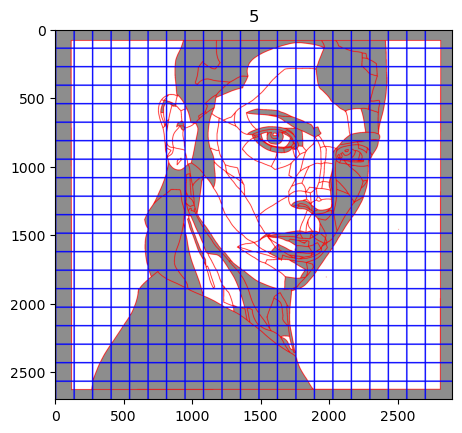

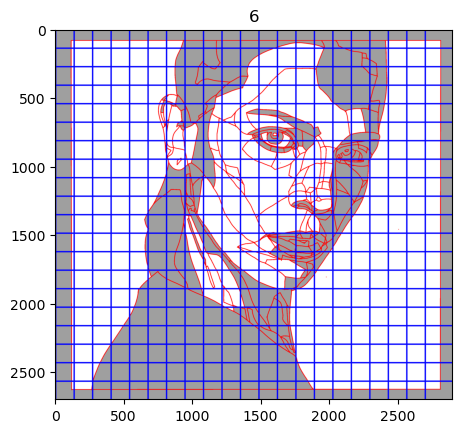

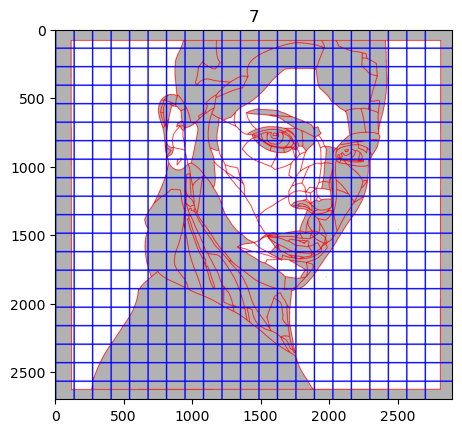

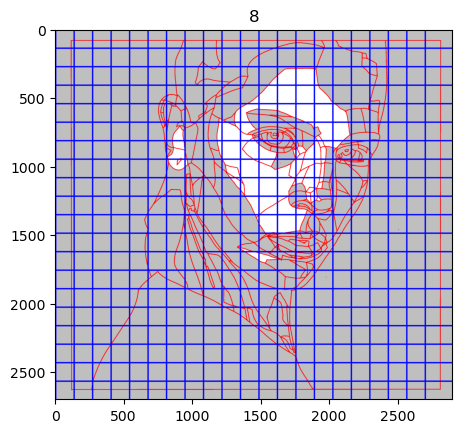

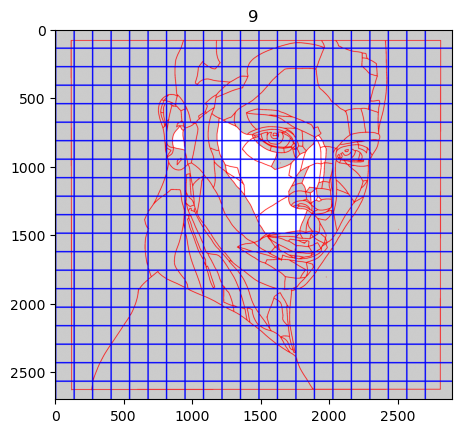

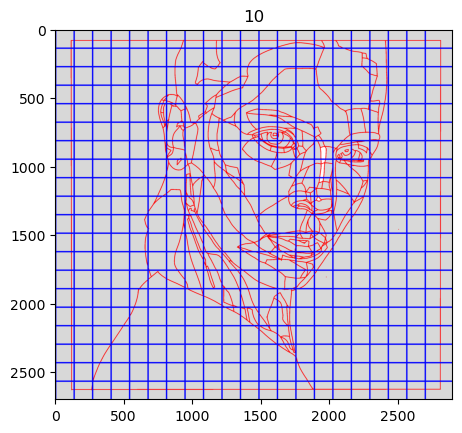

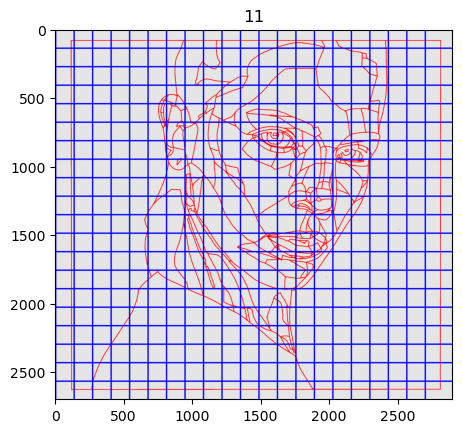

In [116]:
for i, x in enumerate(blanks):
    plt.imshow(x)
    plt.title(i)
    plt.show()

In [180]:
from PIL import Image, ImageDraw, ImageFont
chars = 'abcdefghijklmnopqrstuvwxyz'
background = np.full((blanks[0].shape[0] + grid_res * 2, blanks[0].shape[1] + grid_res * 2, 3), 255, dtype=np.uint8)
fnt = ImageFont.truetype("/Users/erikstorrs/Downloads/Montserrat/Montserrat-VariableFont_wght.ttf", 80)
im = Image.fromarray(background)
drawing = ImageDraw.Draw(im)
for i in range(n_y_tiles):
    y = i * grid_res + grid_res + 30
    x = 30
    drawing.text((x, y), f'{chars[i]}', fill=(0, 0, 255), font=fnt)
for i in range(n_x_tiles):
    x = i * grid_res + grid_res + 30
    y = 30
    drawing.text((x, y), f'{i}', fill=(0, 0, 255), font=fnt )

In [181]:
finals = []
for blank in blanks:
    x = np.asarray(im).copy()
    inner = blank.copy()
    inner *= 255
    inner = inner.astype(np.uint8)
    x[grid_res:grid_res + blank.shape[0], grid_res: grid_res + blank.shape[1]] = inner
    finals.append(x)


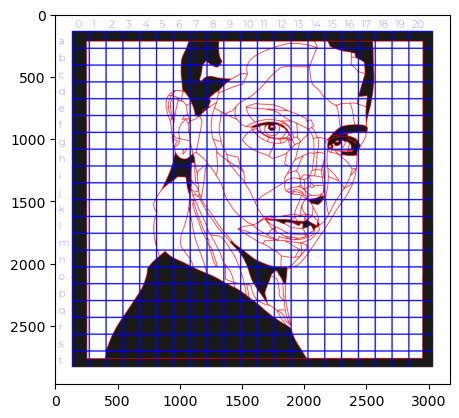

In [182]:
plt.imshow(finals[0])

In [183]:
from pathlib import Path

In [184]:
save_dir = Path('/Users/erikstorrs/Downloads/outs')
save_dir.mkdir(parents=True, exist_ok=True)
for i, x in enumerate(finals):
    fp = save_dir / f'{i}.png'
    skimage.io.imsave(fp, x)

In [39]:
for c in COLORS:
    val = int(c * 255) 
    print('#%02x%02x%02x' % (val, val, val))

#191919
#333333
#4c4c4c
#666666
#7f7f7f
#999999
#b2b2b2
#cccccc
#d8d8d8
#e3e3e3
#eeeeee
#f9f9f9


In [40]:
import re
svg_str = scene._repr_svg_()
head = re.sub(r'^(<svg[^>]+>).*$', r'\1', svg_str)
head += '<g>'

for poly, color in zip(polys, colors):
    val = int(color * 255)
    head += poly.svg(fill_color='#%02x%02x%02x' % (val, val, val), opacity=1.)

head += '</g></svg>'

svg_str

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300" viewBox="-191.04 -191.04 3718.08 5158.08" preserveAspectRatio="xMinYMin meet"><g transform="matrix(1,0,0,-1,0,4776.0)"><g><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="34.3872" opacity="0.6" d="M 0.0,0.0 L 0.0,4776.0 L 3336.0,4776.0 L 3336.0,0.0 L 0.0,0.0 z M 2830.0,898.0 L 2834.0,898.0 L 2834.0,902.0 L 2833.0,902.0 L 2833.0,903.0 L 2830.0,903.0 L 2830.0,902.0 L 2829.0,902.0 L 2829.0,899.0 L 2830.0,899.0 L 2830.0,898.0 z M 568.0,1039.0 L 570.0,1039.0 L 570.0,1040.0 L 571.0,1040.0 L 571.0,1041.0 L 572.0,1041.0 L 572.0,1043.0 L 583.0,1043.0 L 583.0,1042.0 L 587.0,1042.0 L 587.0,1043.0 L 1456.0,1043.0 L 1456.0,1044.0 L 2189.0,1044.0 L 2189.0,1043.0 L 2190.0,1043.0 L 2190.0,1042.0 L 2191.0,1042.0 L 2191.0,1041.0 L 2192.0,1041.0 L 2192.0,1040.0 L 2194.0,1040.0 L 2194.0,1041.0 L 2195.0,1041.0 L 2195.0,1042.0 L 2196.0,1042.0 L 2196.0,1044.0 L 2720.0,1044.0 L 2

In [41]:
with open('/Users/erikstorrs/Downloads/test.svg', 'w') as f:
    f.write(head)